In [16]:
!pip install tensorflow

In [17]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [18]:
actions = ['rabbit', 'mountain', 'go', 'santa', 'snow', 'nose', 'butterfly', 'flower', 'bird']

data = np.concatenate([
    np.load('dataset/seq_rabbit_0.npy'),
    np.load('dataset/seq_mountain_0.npy'),
    np.load('dataset/seq_go_0.npy'),
    np.load('dataset/seq_santa_0.npy'),
    np.load('dataset/seq_snow_0.npy'),
    np.load('dataset/seq_nose_0.npy'),
    np.load('dataset/seq_butterfly_0.npy'),
    np.load('dataset/seq_flower_0.npy'),
    np.load('dataset/seq_bird_0.npy')
], axis=0)

data.shape

(6968, 30, 100)

In [19]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(6968, 30, 99)
(6968,)


In [20]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(6968, 9)

In [21]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6271, 30, 99) (6271, 9)
(697, 30, 99) (697, 9)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                41984     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 9)                 297       
                                                                 
Total params: 44,361
Trainable params: 44,361
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
196/196 [==============================] - ETA: 0s - loss: 6.4775 - acc: 0.4543
Epoch 1: val_acc improved from -inf to 0.75036, saving model to models\model.h5
196/196 [==============================] - 11s 33ms/step - loss: 6.4775 - acc: 0.4543 - val_loss: 1.2866 - val_acc: 0.7504 - lr: 0.0010
Epoch 2/200
196/196 [==============================] - ETA: 0s - loss: 0.6840 - acc: 0.8568
Epoch 2: val_acc improved from 0.75036 to 0.90531, saving model to models\model.h5
196/196 [==============================] - 6s 30ms/step - loss: 0.6840 - acc: 0.8568 - val_loss: 0.4562 - val_acc: 0.9053 - lr: 0.0010
Epoch 3/200
195/196 [============================>.] - ETA: 0s - loss: 0.4528 - acc: 0.9053
Epoch 3: val_acc improved from 0.90531 to 0.94835, saving model to models\model.h5
196/196 [==============================] - 6s 29ms/step - loss: 0.4514 - acc: 0.9054 - val_loss: 0.1802 - val_acc: 0.9484 - lr: 0.0010
Epoch 4/200
196/196 [==============================] - ETA: 0s - loss: 0

Epoch 30/200
195/196 [============================>.] - ETA: 0s - loss: 6.7809 - acc: 0.4272
Epoch 30: val_acc did not improve from 1.00000
196/196 [==============================] - 9s 45ms/step - loss: 6.7547 - acc: 0.4275 - val_loss: 1.2888 - val_acc: 0.6069 - lr: 0.0010
Epoch 31/200
196/196 [==============================] - ETA: 0s - loss: 1.0664 - acc: 0.6710
Epoch 31: val_acc did not improve from 1.00000
196/196 [==============================] - 5s 28ms/step - loss: 1.0664 - acc: 0.6710 - val_loss: 0.7974 - val_acc: 0.7690 - lr: 0.0010
Epoch 32/200
196/196 [==============================] - ETA: 0s - loss: 0.7486 - acc: 0.7774
Epoch 32: val_acc did not improve from 1.00000
196/196 [==============================] - 7s 34ms/step - loss: 0.7486 - acc: 0.7774 - val_loss: 0.6675 - val_acc: 0.8106 - lr: 0.0010
Epoch 33/200
196/196 [==============================] - ETA: 0s - loss: 0.6108 - acc: 0.8238
Epoch 33: val_acc did not improve from 1.00000
196/196 [==========================

KeyboardInterrupt: 

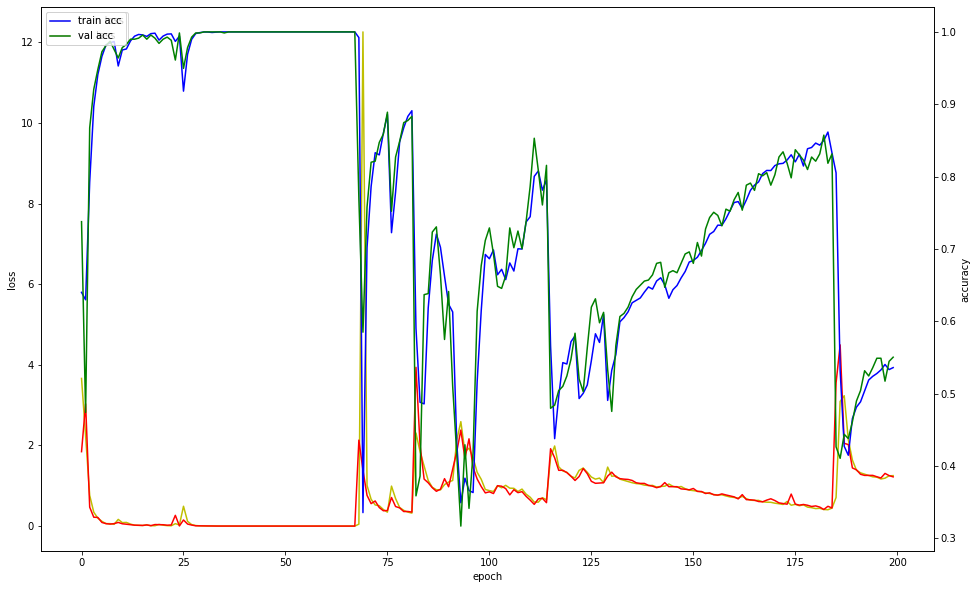

In [24]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [25]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

22/22 [==============================] - 1s 12ms/step


array([[[580,   0],
        [  0, 117]],

       [[586,   0],
        [  0, 111]],

       [[608,   0],
        [  0,  89]],

       [[644,   0],
        [  0,  53]],

       [[593,   0],
        [  0, 104]],

       [[649,   0],
        [  0,  48]],

       [[636,   0],
        [  0,  61]],

       [[634,   0],
        [  0,  63]],

       [[646,   0],
        [  0,  51]]], dtype=int64)